# Adult Income Analysis 

In this Project I am trying to analyse income(salary) of adults acorss the world and build a predictive machine learning model to accurately predict if an individual has salary > 50,000$ 

## 1.0 Case:

In this project, we will test out several Machine learning algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Our goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. 

**Objective:** Testing out several different supervised/Unsupervised learning algorithms over income data of subjects to find the one that accurately predicts if an individual makes more than $50,000.

**Usablity:**

* This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can infer this value from other publically available features
* This can also be useful in Credit card Banking to choose customers for their credit cards divisions

**Data:**

* 48842 instances, mix of continuous and discrete (train=32561, test=16281) 
* 45222 if instances with unknown values are removed (train=30162, test=15060)  
* Probability for the label '>50K' : 23.93%
* Probability for the label '<=50K' : 76.07% 

**Attribute Information:**

Listing of attributes:

Response / label 

>50K, <=50K

* age: continuous
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, *5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-* * * clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



## 1.1 Importing Packages

In [230]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import os
from IPython.display import Markdown, display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import visualisation libraries
#import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

def printmd(string):
    display(Markdown(string))
    
#import modelling packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Pretty display for notebooks
%matplotlib inline

#from __future__ import division


## 1.2 Data Import

In [236]:
#change directory and import data
os.getcwd()
os.chdir('C:/Users/vidhi/Documents/gitStuff/IncomeAnalysis')

#column_names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

train = pd.read_csv('income_train.csv', header=None, names = column_names,engine = 'python')
test = pd.read_csv('income_test.csv',  header=None, names = column_names, engine = 'python')

#check shape of data
printmd('## 1.3. Data shape check')
print('Train data:',train.shape)
print('Test data:',test.shape)
income = pd.concat([test,train])
income.reset_index(inplace = True, drop = True)
print('Full data post combining:',income.shape)
printmd('## Snapshot')
income.head(10)


## 1.3. Data shape check

Train data: (32561, 15)
Test data: (16281, 15)
Full data post combining: (48842, 15)


## Snapshot

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


## 1.4 Data quality check

In [237]:
printmd('## (a) .Columns and their types')
print(income.info());

## (a) .Columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


**Observation**: A mixture of  categorical and continious columns.

In [238]:
# Top 5 records
printmd('## (b). Data Snapshot')
income.head()

## (b). Data Snapshot

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [239]:
printmd('## (c). Summary Statistics')

income.describe()

## (c). Summary Statistics

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Observation**: 
* Heavy skewness in capital gain and capital loss columns


In [240]:
printmd('## (d). Missing values')
income.isnull().sum()

## (d). Missing values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## (e) Correlation Plot

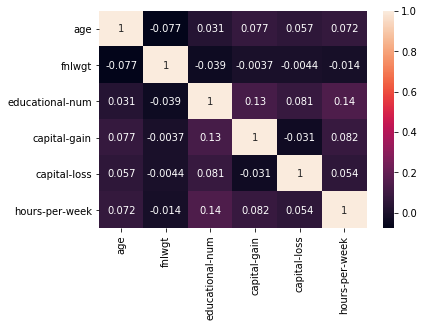

In [241]:
printmd('## (e) Correlation Plot')
corrMatrix = income.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Observation**: In ideal scenario predictors should not have any correlation among themselves, this plot helps us confirm that..

## 1.5 Data quality check

In [247]:
#Response
income['income']=income['income'].str.strip()
income=income.replace({'income' : { '<=50K.' : '<=50K', '>50K.' : '>50K'}})

#workclass
income['workclass']=income['workclass'].str.strip()
income=income.replace({'workclass' : { '?' : 'Not-specified'}})

#Headers
income=income.rename(columns={"marital-status": "MaritalSt","educational-num": "Edunum" ,"capital-gain": "capitalgain","capital-loss": "capitalloss","hours-per-week": "hoursperweek","native-country": "nativecountry"})

#Occupation
income['occupation']=income['occupation'].str.strip()
income=income.replace({'occupation' : { '?' : 'Not-specified'}})

#nativecountry
income['nativecountry']=income['nativecountry'].str.strip()
income=income.replace({'nativecountry' : { '?' : 'Not-specified'}})


### Sampling Check: 
It is imperative to understand if the data under study covers all countries of the world or is baised towards a geographical location. For doing the same I have **created a "country" - "country code" dataset** of all unique countries present in income dataset. A group-by analysis will help understand the distribution of count of subjects taken under study

**Explanation of Country code dataset**

* This dataset has country names with its country code
* 2-3 character country codes that represent country names makes it easier to plot the country wise data
* Gives us easier comprehension of information

**Steps:**
* Import country code data , investigate the shape (42,2)
* Investigate the unique columns and match it with original dataset
* **Join** the 2 datasets and name it as income_cc
* **groupby** income_cc based on country code and calculate a percentage of count using **lambda** functions
* plot a bar chart of this percentage count from each country


In [248]:
countrycode = pd.read_csv('countrycode.csv', engine = 'python')
countrycode.shape

(42, 2)

In [249]:
income[['nativecountry']].sort_values(by=['nativecountry'])['nativecountry'].unique()

array(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Not-specified', 'Outlying-US(Guam-USVI-etc)', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland',
       'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States',
       'Vietnam', 'Yugoslavia'], dtype=object)

In [250]:
countrycode['country'].unique()

array(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'], dtype=object)

In [251]:
#join
income_cc=pd.merge(income,countrycode,left_on='nativecountry',right_on='country',how="left")

In [252]:
#group by country code
geo_dist=income_cc.groupby('code').size()
n=income_cc.shape[0]

# use lambda function to calculate percentage of 
geo_perdist=geo_dist.apply(lambda x: round((x/n)*100,3))

#sort values
geo_perdist.sort_values(ascending=False)

code
US     89.742
MX      1.947
PH      0.604
DE      0.422
PR      0.377
CA      0.373
SV      0.317
IN      0.309
CU      0.283
ENG     0.260
CN      0.250
S       0.235
JM      0.217
IT      0.215
DO      0.211
JP      0.188
GT      0.180
PL      0.178
VN      0.176
CO      0.174
HT      0.154
PT      0.137
TW      0.133
IR      0.121
NI      0.100
GR      0.100
PE      0.094
EC      0.092
FR      0.078
IE      0.076
TH      0.061
HK      0.061
KH      0.057
TT      0.055
YG      0.047
OUS     0.047
LA      0.047
SCO     0.043
HN      0.041
HU      0.039
HO      0.002
dtype: float64

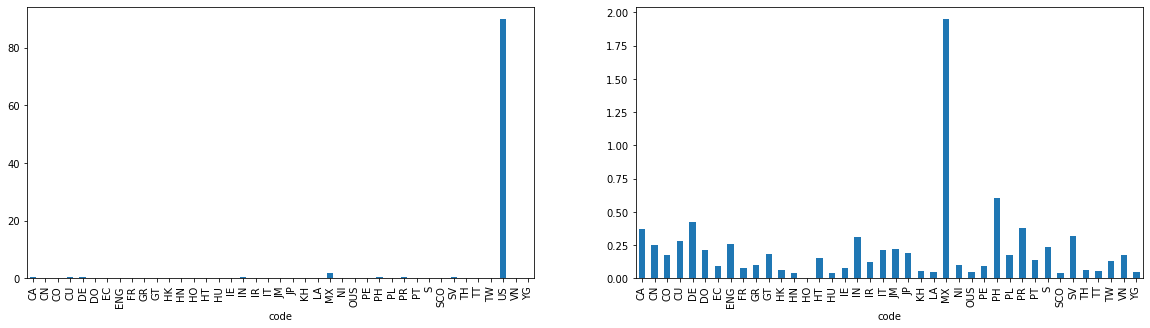

In [253]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 2x1 grid, and give me the first section
ax2 = fig.add_subplot(122)

#plot a graph with USA
geo_perdist.plot(kind='bar',ax=ax1,figsize=(20,5))
#plot a graph without USA
geo_perdist.drop(labels=['US']).plot(kind='bar',ax=ax2,figsize=(20,5))


**Insight**

It is clear that data distribution based on geograpgy is baised 

* Close to **90\%** of candidates under study were from USA
* The second highest number were from Mexico but that obly comprises of **2%** of total data

**Conclusion**
This analysis majorly covers candidates from USA (90%) hence we need to be cautious when applying the models based on this data on data from other countries.


### Snapshot of data

In [256]:
income.head(10)

,age,workclass,fnlwgt,education,Edunum,MaritalSt,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Not-specified,103497,Some-college,10,Never-married,Not-specified,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Not-specified,227026,HS-grad,9,Never-married,Not-specified,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## 2.0. Exploratory Data Analysis
### Visualization based analysis

### (a).Categorical columns: data pre processing

In [257]:
# Creating a dictionary that has unique combinations of education and it's corresponding education level
edu_level = {}
for x,y in income[['Edunum','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x


#### Scrub data for better Visualization

In [260]:

education = round(pd.crosstab(income.education, income.income).div(pd.crosstab(income.education, income.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

workclass = round(pd.crosstab(income.workclass, income.income).div(pd.crosstab(income.workclass, income.income).apply(sum,1),0),2)
workclass = workclass.reindex()

MaritalSt = round(pd.crosstab(income.MaritalSt, income.income).div(pd.crosstab(income.MaritalSt, income.income).apply(sum,1),0),2)
MaritalSt = MaritalSt.reindex()

occupation = round(pd.crosstab(income.occupation, income.income).div(pd.crosstab(income.occupation, income.income).apply(sum,1),0),2)
occupation = occupation.reindex()

race = round(pd.crosstab(income.race, income.income).div(pd.crosstab(income.race, income.income).apply(sum,1),0),2)
race = race.reindex()

gender = round(pd.crosstab(income.gender, income.income).div(pd.crosstab(income.gender, income.income).apply(sum,1),0),2)
gender = gender.reindex()

nativecountry = round(pd.crosstab(income.nativecountry, income.income).div(pd.crosstab(income.nativecountry, income.income).apply(sum,1),0),2)
nativecountry = nativecountry.reindex()

### Education | Workclass

Text(0, 0.5, 'Proportion of population')

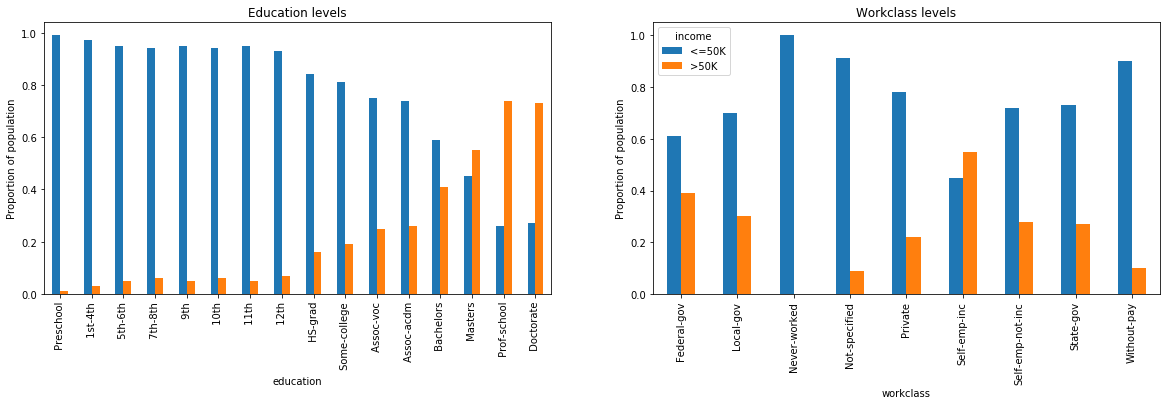

In [261]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

education.plot(kind ='bar', title = 'Education levels', figsize = (20,5),ax=ax1,legend=False);
ax1.set_ylabel('Proportion of population')

workclass.plot(kind ='bar', title = 'Workclass levels', figsize = (20,5),ax=ax2);
ax2.set_ylabel('Proportion of population')

**Observation:** 
* As the education of a person increases his salary also increases
* People who have never worked have never earned, which is an obvious expectation.
* Higher propotion of Self employed people earn more than 50,000


### Marital Status | Occupation

Text(0, 0.5, 'Proportion of population')

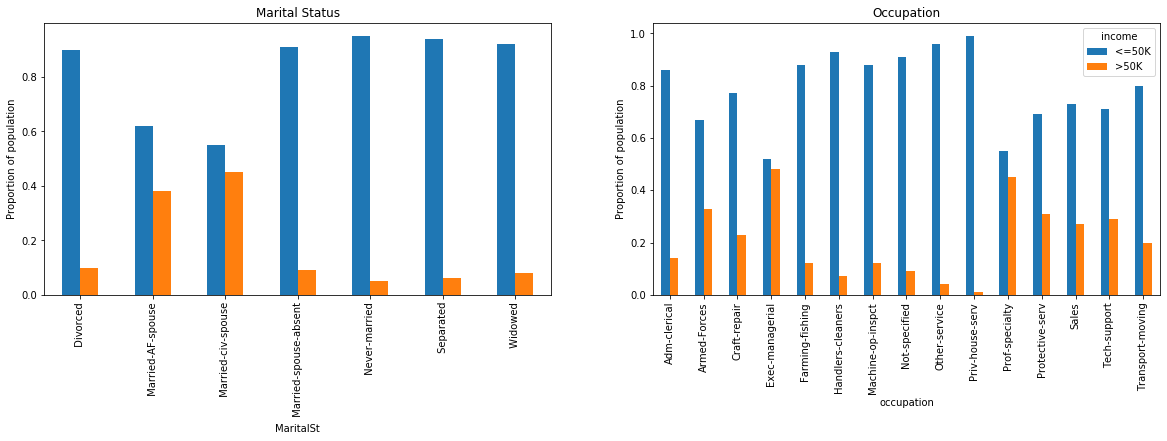

In [263]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

MaritalSt.plot(kind ='bar', title = 'Marital Status', figsize = (20,5),ax=ax1,legend=False);
ax1.set_ylabel('Proportion of population')

occupation.plot(kind ='bar', title = 'Occupation', figsize = (20,5),ax=ax2);
ax2.set_ylabel('Proportion of population')

**Observation:** 
* Higher propotion of people who are Single earn <50,000
* Higher propotion of people in category Professors and Exec Managers have >50,000 salary
* Very few Private house servants earn >50,000 salary


### Race | Gender

Text(0, 0.5, 'Proportion of population')

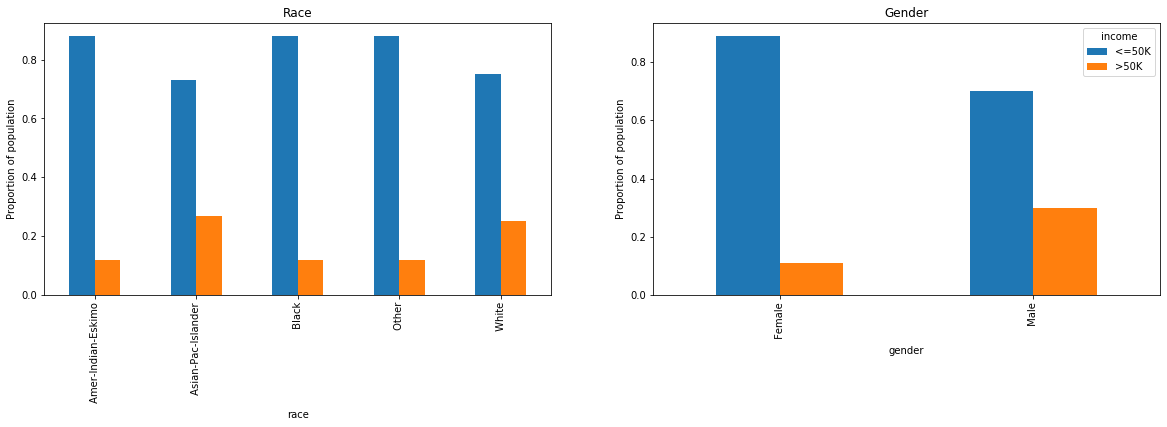

In [264]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

race.plot(kind ='bar', title = 'Race', figsize = (20,5),ax=ax1,legend=False);
ax1.set_ylabel('Proportion of population')

gender.plot(kind ='bar', title = 'Gender',ax=ax2,figsize = (20,5));
ax2.set_ylabel('Proportion of population')

## Observation
* Higher propotion of Asian people earn more than 50,000 
* Higher propotion of females earn <50,000 as compared to males

### Country

Text(0, 0.5, 'Proportion of population')

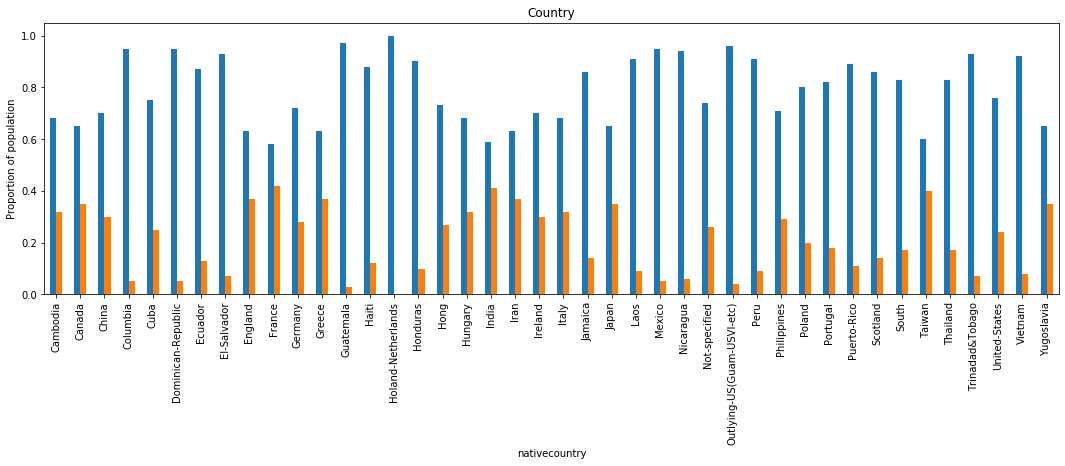

In [266]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

nativecountry.plot(kind ='bar', title = 'Country', figsize = (40,5),ax=ax1,legend=False);
ax1.set_ylabel('Proportion of population')

## Observation:
* India, France, England, Canada, Taiwan have comparatively higher propotion of high earners than other countries.

### Continious Columns

### Age | hours per week

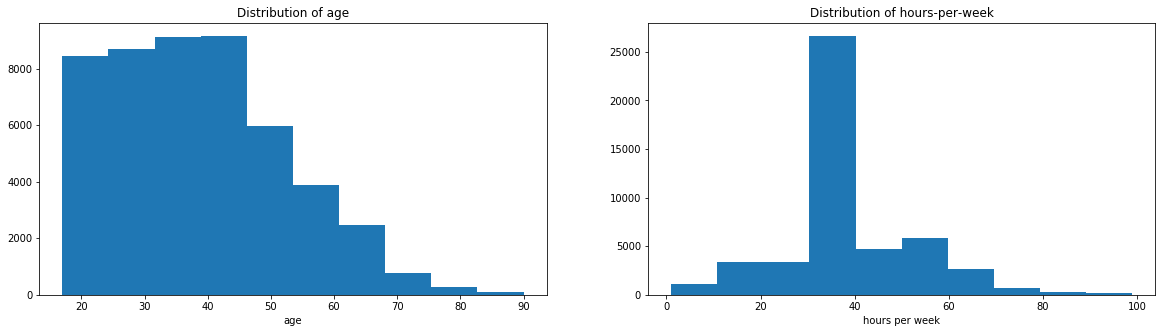

In [267]:
fig, ax=plt.subplots(1,2, figsize=(20,5))

ax[0].hist('age',data=income)
ax[0].set_xlabel('age')

ax[1].hist('hoursperweek',data=income)
ax[1].set_xlabel("hours per week")

#plt.show()
ax[0].set_title("Distribution of age");
ax[1].set_title("Distribution of hours-per-week");

## Observation:
* Age has a Right skewed distribution
* hours per week has high mode, it means most people work for same number of hours

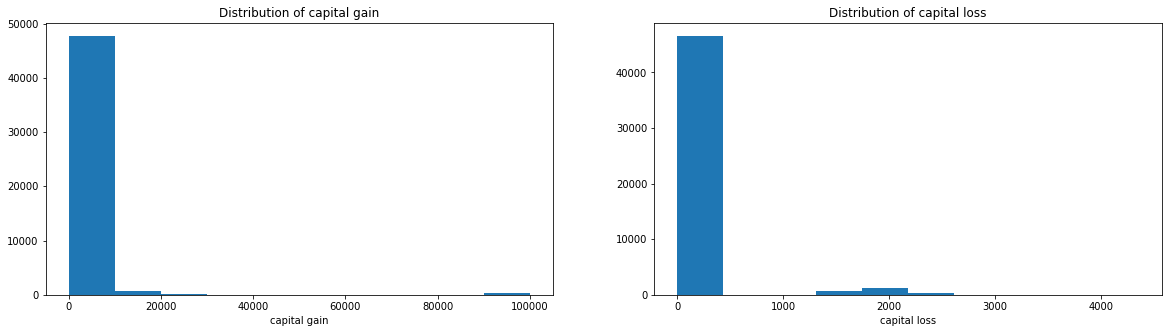

In [268]:
fig, ax=plt.subplots(1,2, figsize=(20,5))

ax[0].hist('capitalgain',data=income)
ax[0].set_xlabel("capital gain")

ax[1].hist('capitalloss',data=income)
ax[1].set_xlabel("capital loss")

ax[0].set_title("Distribution of capital gain");
ax[1].set_title("Distribution of capital loss");

### Observation: 
* Severly Skewed Continuous: High mode value for data near to 0 , but a significant amount of values are also present near another value, this would rather look like a skewed bimodal distribution with a mode being very high than the other mode.

Lets check out the box plot of these 2 features


## Boxplot: Age| hoursperweek

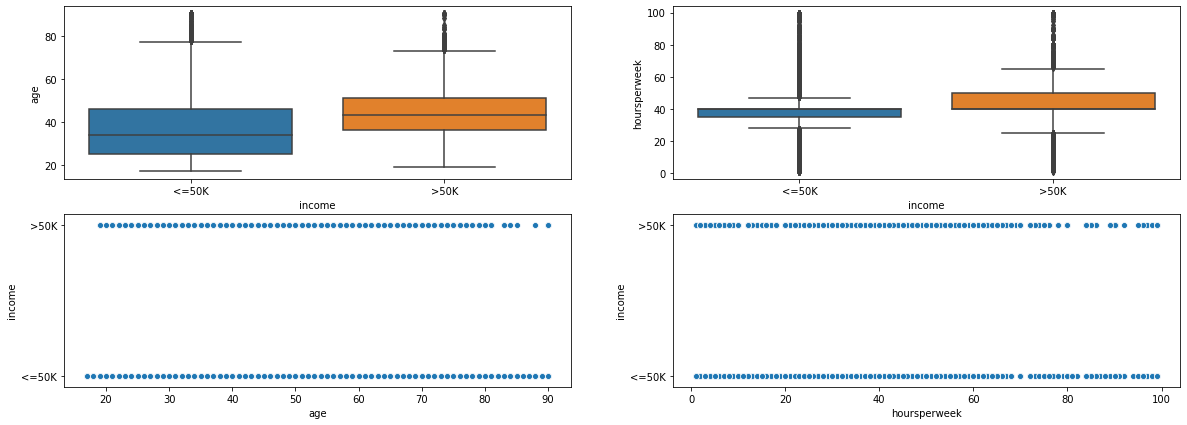

In [269]:
fig,ax = plt.subplots(2,2,figsize=(20,7))
sns.boxplot(x='income', y= 'age',data=income,ax=ax[0,0]);
sns.boxplot(x='income', y= 'hoursperweek',data=income,ax=ax[0,1]);

sns.scatterplot(x='age', y= 'income',data=income,ax=ax[1,0]);
sns.scatterplot(x='hoursperweek', y= 'income',data=income,ax=ax[1,1]);

#### Takeaway:
* Mean number of High earners(orange) is higher than Mean number of Low earners for both hoursper week and age
* Most people in work for similar(close to similar number of hours)

## 3.0 Data Preprocessing

### (a). Preparing the Data
Data-gathering methods are often loosely controlled, resulting in out-of-range values (e.g., Income: −100), impossible data combinations (e.g., Sex: Male, Pregnant: Yes), missing values, etc. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### (b). Data Transformation
#### Log transformation on capital gain and Capital loss to balance out the data distribution 

A few predictors may have a unbalanced distribution. The distibutions happens to have skewed bi-modal distribution Values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. 

The income dataset also has 2 such predictors that qulaify for this category: 'capital-gain' and 'capital-loss'.

Let's plot a histogram of these two features and see how they are distributed.

In [270]:
# Split the data into predictors and response variable
income_raw = income['income']
predictor_raw = income.drop('income', axis = 1)

# Log-transform the skewed features
skewed = ['capitalgain', 'capitalloss']
predictor_raw[skewed] = income[skewed].apply(lambda x: np.log(x + 1))

printmd("Snapshot of predictors with Log-transform the skewed features(capital gain & capital loss)")
predictor_raw.head(10)

Snapshot of predictors with Log-transform the skewed features(capital gain & capital loss)

,age,workclass,fnlwgt,education,Edunum,MaritalSt,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,40,United-States
4,18,Not-specified,103497,Some-college,10,Never-married,Not-specified,Own-child,White,Female,0.000000,0.0,30,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,30,United-States
6,29,Not-specified,227026,HS-grad,9,Never-married,Not-specified,Unmarried,Black,Male,0.000000,0.0,40,United-States
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,8.040447,0.0,32,United-States
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0.000000,0.0,40,United-States
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0.000000,0.0,10,United-States


### lets revisit the distribution 

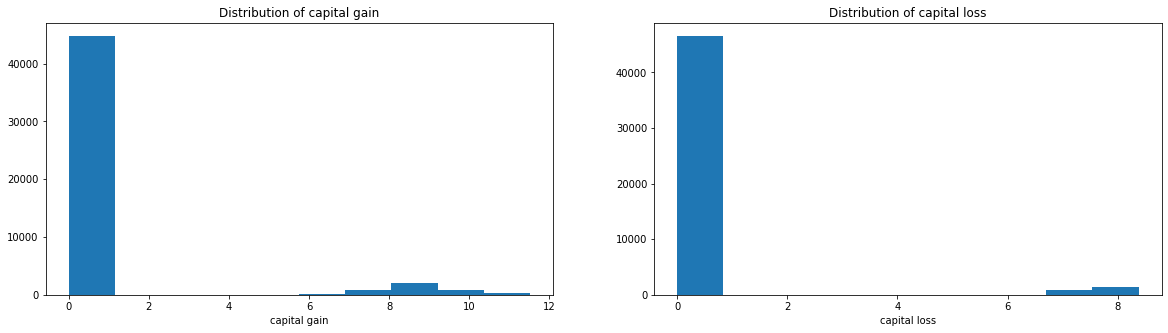

In [271]:
fig, ax=plt.subplots(1,2, figsize=(20,5))

ax[0].hist('capitalgain',data=predictor_raw)
ax[0].set_xlabel("capital gain")

ax[1].hist('capitalloss',data=predictor_raw)
ax[1].set_xlabel("capital loss")

ax[0].set_title("Distribution of capital gain");
ax[1].set_title("Distribution of capital loss");

### (c). Feature Selection


Feature selection is very important to monitor data leakage & refrain redundanct in predictors.

* Here education is represented by 2 coulmns. Hence For education level, we have 2 features that convey the same meaning,'education' and 'educational-num'. 
* To avoid the effect of this attribute on the models to be overstated, I am not going to use the categorical education attribute.')
* Also, columns 'Fnlwgt' attribute that is used by the census, is dropped.
  

In [272]:
predictor_raw.drop(columns = ['education','fnlwgt'], inplace = True)
predictor_raw.head(10)

,age,workclass,Edunum,MaritalSt,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,40,United-States
4,18,Not-specified,10,Never-married,Not-specified,Own-child,White,Female,0.000000,0.0,30,United-States
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,30,United-States
6,29,Not-specified,9,Never-married,Not-specified,Unmarried,Black,Male,0.000000,0.0,40,United-States
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,8.040447,0.0,32,United-States
8,24,Private,10,Never-married,Other-service,Unmarried,White,Female,0.000000,0.0,40,United-States
9,55,Private,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0.000000,0.0,10,United-States


### (d).Normalizing Numerical Features

It is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [273]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'Edunum', 'capitalgain', 'capitalloss', 'hoursperweek']
predictor_raw[numerical] = scaler.fit_transform(predictor_raw[numerical])

# Show an example of 5 record with scaling applied
display(predictor_raw.head(5))

,age,workclass,Edunum,MaritalSt,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,0.109589,Private,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States
1,0.287671,Private,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States
2,0.150685,Local-gov,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States
3,0.369863,Private,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.777174,0.0,0.397959,United-States
4,0.013699,Not-specified,0.600000,Never-married,Not-specified,Own-child,White,Female,0.000000,0.0,0.295918,United-States


### (e). Scrubbing Categorical columns

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. 

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively.

In [274]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
predictor = pd.get_dummies(predictor_raw)

# TODO: Encode the 'income_raw' data to numerical values
response = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(predictor.columns)
print("The number of features after one-hot encoding",str(len(encoded)))

# Uncomment to explore the encoded feature names 
# print(encoded)

The number of features after one-hot encoding 91


### (f). Shuffle and Split Data

Untill here, The data is clean, scrubbed, normalized, encoded and ready to used for further analysis.At this step data spilt is undertaken to divide the data into test and train datasets.
* 80% of the data will be used for training and 20% for testing.


In [275]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.2, random_state = 8451)

# Show the results of the split
print("No. of Training set lineitems :",X_train.shape[0])
print("No of Testing set lineitems: ",X_test.shape[0])

No. of Training set lineitems : 39073
No of Testing set lineitems:  9769


## 4.0 Modelling the data
As we here are trying to predict if a particular person will have income >=50,000, we need to make a predictive model. The response variable being Binary in nature requires our model to be a Binary classification model based on Supervised Learning Methodology.


### 4.0.1 logistic Regression

In [276]:
from sklearn.linear_model import LogisticRegression

#create an instance and fit the model 
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train);

**Steps**
* We start by importing the LogisticRegression package from the Linear model family.
* Then create an instance of the logistic regression model and call it log model and then fit the model on the training dataset.
* Let’s see how accurate is our model for predictions

In [277]:
#predictions function 
Predictions = logmodel.predict(X_test)
Predictions

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

### Model Evaluation
We can check precision, recall, f1-score using classification report and also see how accurate is our model for predictions:

In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7430
           1       0.72      0.59      0.65      2339

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



Let us now see the **confusion matrix**:


In [279]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))
confusionData=confusion_matrix(y_test, Predictions)

[[6895  535]
 [ 949 1390]]


From our confusion matrix we conclude that:
True positive: 6895(We predicted a positive result and it was positive)
True negative: 1390(We predicted a negative result and it was negative)
False positive: 535(We predicted a positive result and it was negative)
False negative: 949(We predicted a negative result and it was positive)

Inoder to compare 2 models for their prediction power we need to decide on a few criterians, such as
* accuracy = ((TP+TN))/(TP+FN+FP+TN)
*  precision = (TP)/(TP+FP)
*  recall = (TP)/(TP+FN)
*  f_measure = (2*recall*precision)/(recall+precision)
*  sensitivity = TP / (TP + FN)
*  specificity = TN / (TN + FP)
*  error_rate = 1 - accuracy


### Evaluation Function
Below function takes in the confusion matric and delivers an array of metric criterians(mentioned above) for compairing different models


In [280]:
def ConfsnMtxEval(a):
    TP = a[0,0]
    TN = a[1,1]
    FP = a[0,1]
    FN = a[1,0]
    
    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  round(accuracy,3)
    out['precision'] = round(precision,3)
    out['recall'] = round(recall,3)
    out['f_measure'] = round(f_measure,3)
    out['sensitivity'] = round(sensitivity,3)
    out['specificity'] = round(specificity,3)
    out['error_rate'] = round(error_rate,3)
    return out

In [288]:
#confusion matrix

LogEvaluated=ConfsnMtxEval(confusionData)
print(LogEvaluated)
print('Accuracy of Logistic Model: ',(LogEvaluated['accuracy']))

{'accuracy': 0.848, 'precision': 0.928, 'recall': 0.879, 'f_measure': 0.903, 'sensitivity': 0.879, 'specificity': 0.722, 'error_rate': 0.152}
Accuracy of Logistic Model:  0.848


In [289]:
eval_model = round(pd.DataFrame([LogEvaluated], index = ['Logistic Model']),4)
display(eval_model)

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
Logistic Model,0.848,0.152,0.903,0.928,0.879,0.879,0.722


The accuracy can be measured as a percentage and its 84.8 for the Logistic Model, which is a good score. Ideally any score above 70% can be considered as fair.But keep in consideration the application context this figure can be decided as satisfactory.

Lets see if this Accuracy can be improced with the Decision Tree(CART models)...

### 4.0.2 Decision Trees

For Decision Tree classifier I decided to use Gini Index based splitting, with a Minimum samples split=0.05, and Min_samples_leaf=0.001. 
These parameters play a important role in precision accuracy of the model. We can implement hyper parameter tuning or Grid search method to 
select the optimum values of these

Let's first implement for constant values

In [290]:
dt_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001, max_features = None)
dt_gini = dt_gini.fit(X_train, y_train)
dt_gini_pred = dt_gini.predict(X_test)
dt_gini_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [291]:
print(classification_report(y_test,dt_gini_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7430
           1       0.79      0.55      0.65      2339

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [292]:
#confusion matrix

print(confusion_matrix(y_test, dt_gini_pred))
dt_confusionData=confusion_matrix(y_test, dt_gini_pred)

[[7093  337]
 [1054 1285]]


In [294]:
#evaluation

dtEvaluated=ConfsnMtxEval(dt_confusionData)
print(dtEvaluated)
print('Accuracy of Logistic Model: ',(dtEvaluated['accuracy']))

{'accuracy': 0.858, 'precision': 0.955, 'recall': 0.871, 'f_measure': 0.911, 'sensitivity': 0.871, 'specificity': 0.792, 'error_rate': 0.142}
Accuracy of Logistic Model:  0.858


In [295]:
eval_model = round(pd.DataFrame([LogEvaluated, dtEvaluated], index = ['Logistic Model','Decision Trees']),4)
display(eval_model)

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
Logistic Model,0.848,0.152,0.903,0.928,0.879,0.879,0.722
Decision Trees,0.858,0.142,0.911,0.955,0.871,0.871,0.792


Observation: We observe that 
* accuracy has improved by 1% with Classification Trees
* Sensitivity has decreased with Classification Trees
* Specificity has increased with Classification Trees

Lets further implement Esemble methods to see if they improve the prediction Accuracy...


## 4.0.3 Esemble Methods
### 4.0.3.1 Bagging: Bootstrap with Aggregation

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.

For the this classifier, we need to set some parameters as well, namely

* number of trees, 
* splitting criteria,
* minimum samples required to split, 
* max depth of the tree, 
* minimum samples required at the leaf level and 
* the maximum features to consider when looking for the best split.

In general the values selected for these parameters are as following :

*	Num estimators: 100 (Best amongst 10, 50 and 100)
*	Splitting criteria: Gini Index (Using Gini Index marginally outperforms than Entropy)
*	Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)
*	Max Depth: None
*	Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)
*	Max features: sqrt (Performs better than 'auto', 'log2' and 'sqrt'.)


In [296]:
# bagging
bagg = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
bagg.fit(X_train, y_train)
bagg_pred = bagg.predict(X_test)


In [297]:
#confusion Matrix

print(confusion_matrix(y_test, bagg_pred))
bg_confusionData=confusion_matrix(y_test, bagg_pred)

[[7087  343]
 [1062 1277]]


In [298]:
#Model Evaluation

bgEvaluated=ConfsnMtxEval(bg_confusionData)
print(bgEvaluated)
print('Bagging Accuracy: ',(bgEvaluated['accuracy']))

{'accuracy': 0.856, 'precision': 0.954, 'recall': 0.87, 'f_measure': 0.91, 'sensitivity': 0.87, 'specificity': 0.788, 'error_rate': 0.144}
Bagging Accuracy:  0.856


In [299]:
eval_model = round(pd.DataFrame([bgEvaluated], index = ['Bagging']),4)
display(eval_model)

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
Bagging,0.856,0.144,0.91,0.954,0.87,0.87,0.788


### 4.0.3.2 Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

For random forst classifies only difference from bagging in maxfeatures=sqrt(no of features)

In [302]:
# random Forest
rforest = RandomForestClassifier(n_estimators=100, criterion = 'gini',  min_samples_split = 0.05, min_samples_leaf = 0.001)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

In [303]:
#confusion Matrix
print(confusion_matrix(y_test, rforest_pred))
rf_confusionData=confusion_matrix(y_test, rforest_pred)

[[7094  336]
 [1103 1236]]


In [304]:
#Model Evaluation
rfEvaluated=ConfsnMtxEval(rf_confusionData)
print(rfEvaluated)
print('Random Forest Accuracy: ',(rfEvaluated['accuracy']))

{'accuracy': 0.853, 'precision': 0.955, 'recall': 0.865, 'f_measure': 0.908, 'sensitivity': 0.865, 'specificity': 0.786, 'error_rate': 0.147}
Random Forest Accuracy:  0.853


In [305]:
eval_model = round(pd.DataFrame([bgEvaluated, rfEvaluated], index = ['Bagging','RandomForest']),4)
display(eval_model)

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
Bagging,0.856,0.144,0.910,0.954,0.870,0.870,0.788
RandomForest,0.853,0.147,0.908,0.955,0.865,0.865,0.786


### 4.0.1.3. Boosting: Adaboost
For the adaboost classifier, I used similar number for number of estimators as used in abouve tree methods

*	**Base Estimator:** DecisionTreeClassifier
*	**Num estimators:** 100 (Best amongst 10, 50 and 100.)


In [306]:
#model

adaboost = AdaBoostClassifier(n_estimators=100)                     
adaboost.fit(X_train, y_train)
ada_pred = adaboost.predict(X_test)

In [307]:
#confusion Matrix
print(confusion_matrix(y_test, ada_pred))
ada_confusionData=confusion_matrix(y_test, ada_pred)

[[7018  412]
 [ 875 1464]]


In [308]:
#Model Evaluation
adaEvaluated=ConfsnMtxEval(ada_confusionData)
print(adaEvaluated)
print('Adaboost Accuracy: ',(adaEvaluated['accuracy']))

{'accuracy': 0.868, 'precision': 0.945, 'recall': 0.889, 'f_measure': 0.916, 'sensitivity': 0.889, 'specificity': 0.78, 'error_rate': 0.132}
Adaboost Accuracy:  0.868


In [309]:
printmd('Model Evaulation ')
ovl_ada = round(pd.DataFrame([adaEvaluated], index = ['adaboost']),4)
display(ovl_ada)

Model Evaulation 

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
adaboost,0.868,0.132,0.916,0.945,0.889,0.889,0.78


### 4.1.4 K Nearest Neighbour:
An unsupervised approach, knn  is a non-parametric method used for classification and regression

For the K nearest neighbours classifier, a grid search is employed to find the optimum value of k. For every odd number ranging from 1 to 50.

[The below grid search takes time to execute. The optimum value calculated in first iteration was "17" ]

In [311]:
from sklearn.neighbors import KNeighborsClassifier
knn_outs = l = [None] * 50
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) 
    knn_pred = knn.predict(X_test)
    knn_confusionData=confusion_matrix(y_test, knn_pred)
    knnevaluated =ConfsnMtxEval(knn_confusionData)
    print(i)
    print(knnevaluated['accuracy'])
    knn_outs[i]=knnevaluated['accuracy'] 

1
0.799
3
0.824
5
0.831
7
0.838
9
0.841
11
0.842
13
0.843
15
0.845
17
0.846
19
0.846
21
0.844
23
0.844
25
0.843
27
0.845
29
0.844
31
0.844
33
0.843
35
0.843
37
0.843
39
0.843
41
0.844
43
0.845
45
0.844
47
0.844
49
0.844


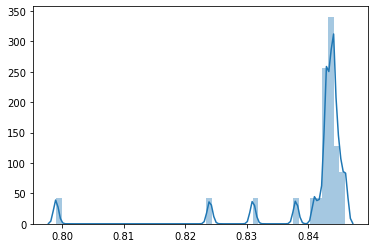

In [312]:
#listcomprehension
knn_Acc=[knn_outs[i] for i in range(len(knn_outs)) if i % 2 == 1]
knn_key=[i for i in range(len(knn_outs)) if i % 2 == 1]
#accuracy plot
sns.distplot(knn_Acc);

In [314]:
data_tuples = list(zip(knn_key,knn_Acc))
knnAccuracy=pd.DataFrame(data_tuples,columns=['key','value'])

#Max accuracy @ k=17 = .846
knnAccuracy.loc[knnAccuracy['value'].idxmax()]
#knnAccuracy.groupby(['key'])['value'].max()

key      17.000
value     0.846
Name: 8, dtype: float64

In [315]:
#i=17
#develop a model based on this optimum value of k as suggested by grid search
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train, y_train) 
knn_pred = knn.predict(X_test)
knn_confusionData=confusion_matrix(y_test, knn_pred)
knnevaluated =ConfsnMtxEval(knn_confusionData)

In [317]:
#model evaluation results
print(knnevaluated)
print('KNN Accuracy: ',(knnevaluated['accuracy']))

{'accuracy': 0.844, 'precision': 0.924, 'recall': 0.877, 'f_measure': 0.9, 'sensitivity': 0.877, 'specificity': 0.709, 'error_rate': 0.156}
KNN Accuracy:  0.844


### 4.1.7. Artificial Neural Network
For the ANN classifier, I used 2 activation functions, the solver for weight optimization, regularization term and learning schedule for weight updates. The following values of the parameters attained the best accuracy during classification. Other parameters were neither applicable to the 'adam' solver nor did it improve the performance of the model. Results in the table below.

*	**Activation:** Logistic Marginally outperformed 'relu'
*   **Solver:** Used the default "Adam" (Works well on relatively large datasets with thousands of training samples or more)
               - 'adam' refers to a stochastic gradient-based optimizer. 
*   **Alpha:** default 0.0001 (Best amongst 1, 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5),I also tried different values but found best result for default               values
*   **Learning Rate:**  'invscaling' (Gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'.)


In [195]:
# Tan H
ann_tanh = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(10, 2), random_state=1, warm_start=True)
ann_tanh.fit(X_train, y_train)                         
ann_tanh_pred = ann_tanh.predict(X_test)
ANN_TanH=confusion_matrix(y_test, ann_tanh_pred)
ann_tanhevaluated =ConfsnMtxEval(ANN_TanH)

# Relu
ann_relu = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-4, 
                    hidden_layer_sizes=(5, 2), random_state=1,
                    learning_rate  = 'invscaling',
                    warm_start = True)
ann_relu.fit(X_train, y_train)                         
ann_relu_pred = ann_relu.predict(X_test)
ANN_relu=confusion_matrix(y_test, ann_relu_pred)
ann_reluevaluated =ConfsnMtxEval(ANN_relu)

# sigmoid
ann_log = MLPClassifier(activation = 'logistic', solver='adam', 
                    alpha=1e-4, hidden_layer_sizes=(5, 2),
                    learning_rate  = 'invscaling', 
                    random_state=1, warm_start = True)
ann_log.fit(X_train, y_train)                        
ann_log_pred = ann_log.predict(X_test)
ANN_log=confusion_matrix(y_test, ann_log_pred)
ann_Logevaluated =ConfsnMtxEval(ANN_log)

# Identity
ann_identity = MLPClassifier(activation = 'identity', solver='adam', 
                             alpha=1e-4, hidden_layer_sizes=(5, 2), 
                             random_state=1, warm_start = True)
ann_identity.fit(X_train, y_train)                         
ann_identity_pred = ann_identity.predict(X_test)
ANN_id=confusion_matrix(y_test, ann_identity_pred)
ann_idevaluated =ConfsnMtxEval(ANN_id)


In [202]:
ann_tanhevaluated

{'accuracy': 0.851,
 'precision': 0.927,
 'recall': 0.883,
 'f_measure': 0.905,
 'sensitivity': 0.883,
 'specificity': 0.724,
 'error_rate': 0.149}

In [197]:
ann_reluevaluated

{'accuracy': 0.85,
 'precision': 0.922,
 'recall': 0.885,
 'f_measure': 0.903,
 'sensitivity': 0.885,
 'specificity': 0.715,
 'error_rate': 0.15}

In [198]:
ann_Logevaluated

{'accuracy': 0.849,
 'precision': 0.921,
 'recall': 0.885,
 'f_measure': 0.903,
 'sensitivity': 0.885,
 'specificity': 0.712,
 'error_rate': 0.151}

In [199]:
ann_idevaluated

{'accuracy': 0.848,
 'precision': 0.926,
 'recall': 0.881,
 'f_measure': 0.903,
 'sensitivity': 0.881,
 'specificity': 0.719,
 'error_rate': 0.152}

In [318]:
printmd('Model Evaulation ')
ovl_ada = round(pd.DataFrame([ann_tanhevaluated,ann_reluevaluated,ann_Logevaluated,ann_idevaluated], 
                             index = ['ann_tanh','ann_relu','ann_Log','ann_id']),4)
ovl_ada.sort_values(by=['accuracy'],ascending=False)

Model Evaulation 

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
ann_tanh,0.851,0.149,0.905,0.927,0.883,0.883,0.724
ann_relu,0.850,0.150,0.903,0.922,0.885,0.885,0.715
ann_Log,0.849,0.151,0.903,0.921,0.885,0.885,0.712
ann_id,0.848,0.152,0.903,0.926,0.881,0.881,0.719


## 5.0 Model Comparision

In [319]:
ModelComparision = round(pd.DataFrame([LogEvaluated, dtEvaluated,bgEvaluated, rfEvaluated,adaEvaluated,knnevaluated, 
                                      ann_tanhevaluated,ann_reluevaluated,ann_Logevaluated,ann_idevaluated],
                                      index = ['Logistic','Dec Trees','Bagging','RandomFrst','adaboost','knn',
                                              'ann_tanh','ann_relu','ann_Log','ann_id']),4)

ModelComparision.sort_values(by=['accuracy'],ascending=False)

,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
adaboost,0.868,0.132,0.916,0.945,0.889,0.889,0.780
Dec Trees,0.858,0.142,0.911,0.955,0.871,0.871,0.792
Bagging,0.856,0.144,0.910,0.954,0.870,0.870,0.788
RandomFrst,0.853,0.147,0.908,0.955,0.865,0.865,0.786
ann_tanh,0.851,0.149,0.905,0.927,0.883,0.883,0.724
ann_relu,0.850,0.150,0.903,0.922,0.885,0.885,0.715
ann_Log,0.849,0.151,0.903,0.921,0.885,0.885,0.712
Logistic,0.848,0.152,0.903,0.928,0.879,0.879,0.722
ann_id,0.848,0.152,0.903,0.926,0.881,0.881,0.719
knn,0.844,0.156,0.900,0.924,0.877,0.877,0.709


**Adaboost in this outperforms all models including neural nets**

Lets divide these criterians into positive criterians: that are **the more the better**
and negative criterians(such as, Miss classification rate) that are **the less the better**


**The more the better criterians:** 'accuracy','precision','f_measure'        Below graph compares these 3 criterians, we can see that adaboost is better in accuracy         but percision is higher for Randomforest . Neural nets do not perform better in any of these criterians

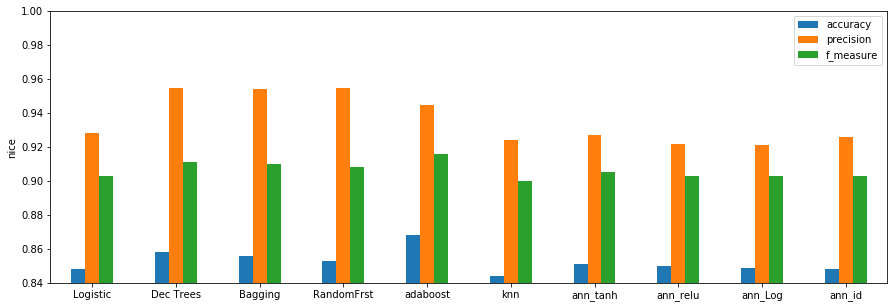

In [320]:
positive=ModelComparision[['accuracy','precision','f_measure']]

fig = plt.figure()
# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(111)
positive.plot(kind='bar',rot=0,figsize = (15,5),ax=ax1);
ax1.set_ylabel('nice')
plt.ylim([.84, 1])

printmd('**The more the better criterians:** \'accuracy\',\'precision\',\'f_measure\'\
        Below graph compares these 3 criterians, we can see that adaboost is better in accuracy \
        but percision is higher for Randomforest . Neural nets do not perform better in any of these criterians')


**The more the better criterians:** 'sensitivity','specificity'        Below graph compares these 2 criterians, we can see that adaboost is highest sensitivity , Neural nets take the second position        .Random forest have better specificity

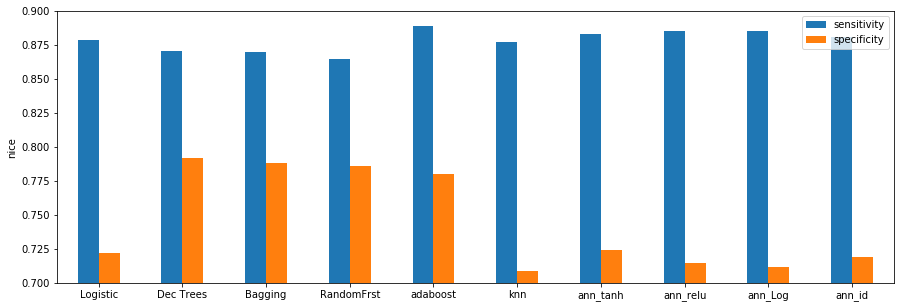

In [321]:
negative=ModelComparision[['sensitivity','specificity']]

fig = plt.figure()
# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(111)
negative.plot(kind='bar',rot=0,figsize = (15,5),ax=ax1);
ax1.set_ylabel('nice')
plt.ylim([.70, .90])

printmd('**The more the better criterians:** \'sensitivity\',\'specificity\'\
        Below graph compares these 2 criterians, we can see that adaboost is highest sensitivity , Neural nets take the second position\
        .Random forest have better specificity')


**The less the better criterians ** 'Missclassification Error Rate: '        Below graph compares MCR, we can see that adaboost has least MCR and outperforms all other models

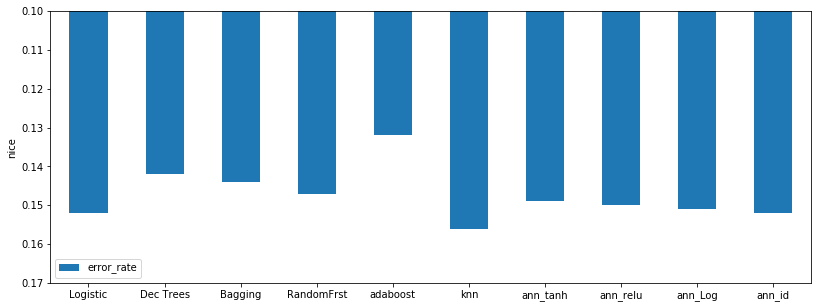

In [322]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)


ModelComparision.plot(kind='bar',y='error_rate', rot=0,figsize = (30,5),ax=ax1);
ax1.set_ylabel('nice')
plt.ylim([.17, .10])

printmd('**The less the better criterians ** \'Missclassification Error Rate: \'\
        Below graph compares MCR, we can see that adaboost has least MCR and outperforms all other models')

### 5.0.1 ROC Curves

I am only plotting ANN_Tanh along with other models, as it outperforms all other models

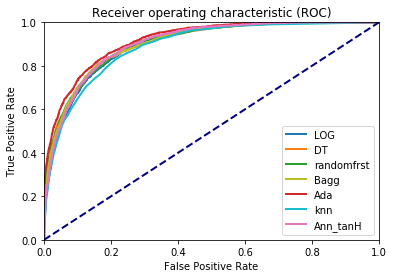

In [325]:
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:red', 'tab:cyan', 'tab:pink', 'tab:gray', 'tab:olive']
lw = 2  
classifiers=[logmodel,dt_gini,bagg,rforest,adaboost,knn,ann_tanh]

fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),classifiers[0].predict_proba(X_test)[:,1])                 
plt.plot(fpr, tpr, color=color[0],lw=lw, label='LOG')

fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),classifiers[1].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color=color[1],lw=lw, label='DT')

fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),classifiers[2].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color=color[2],lw=lw, label='randomfrst')

fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),classifiers[3].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color=color[3],lw=lw, label='Bagg')

fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),classifiers[4].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color=color[4],lw=lw, label='Ada')

fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),classifiers[5].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color=color[5],lw=lw, label='knn')

fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),classifiers[6].predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color=color[6],lw=lw, label='Ann_tanH')

plt.title('Receiver Operating Characteristic');                       
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Roc curve** 

**Bigger the better Criterians of Classification :** We can clearly see **Red** Adaboost curve that is highest of all other curves

**Conclusion:**

Combing the performance statistics of all the model developed, we see that Adaboost gives us the 
*highest Accuracy
*highest Area under ROC curve 
*highest Sensitivity
*highest F-measure
*lowest Miss classification rate 
Although precision is comparatively less than Decision trees & RF 

The advantage of using Adaboost over other models 

*Ensemble methods, including Adaboost are more robust than single estimators, have improved generalizability.* 

*Simple models can be combined to build a complex model, which is computationally fast & more accurate*

However, If we have a biased underlying classifier, it will lead to a biased boosted model. Simply stated Adaboost is sensitive to noisy data and outliers.